# Morphological snakes algorithm for cell segmentation
This notebook demonstrates how to use the GPU-implementation of the `morphological_chan_vese` segmentation algorithm. It is useful for sementing objects that are surrounded by intensity gradients, such as cells surrounded by marked membranes in fluorescence microscopy images.

See also
* [scikit-image documentation of morphological_chan_vese](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.morphological_chan_vese)
* [A Morphological Approach to Curvature-Based Evolution of Curves and Surfaces, Márquez-Neila et al](https://ieeexplore.ieee.org/document/6529072)

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.data import cells3d
from skimage.segmentation import morphological_chan_vese
import timeit
import stackview
from skimage.io import imread
cle.select_device("TX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = cells3d()[30,0,...]
#cle.asarray(image)

It is recommended to apply the algorithm to an image with equalized background intensity.

cl.OCLArray([[0.9178023 , 1.090274  , 1.4726648 , ..., 0.7241896 , 0.6729306 ,
        0.6711849 ],
       [0.917227  , 1.0674586 , 1.6082848 , ..., 0.70604837, 0.71757126,
        0.69825596],
       [0.93129945, 1.2519282 , 1.7861464 , ..., 0.83825123, 0.76400876,
        0.79552275],
       ...,
       [0.68131644, 0.71315765, 0.6904286 , ..., 1.7797264 , 1.7004015 ,
        1.8670223 ],
       [0.7588168 , 0.8026982 , 0.8340448 , ..., 1.5616127 , 1.7600938 ,
        1.6124313 ],
       [0.71979123, 0.7125934 , 0.85827726, ..., 1.2010278 , 1.3635693 ,
        1.3926189 ]], dtype=float32)
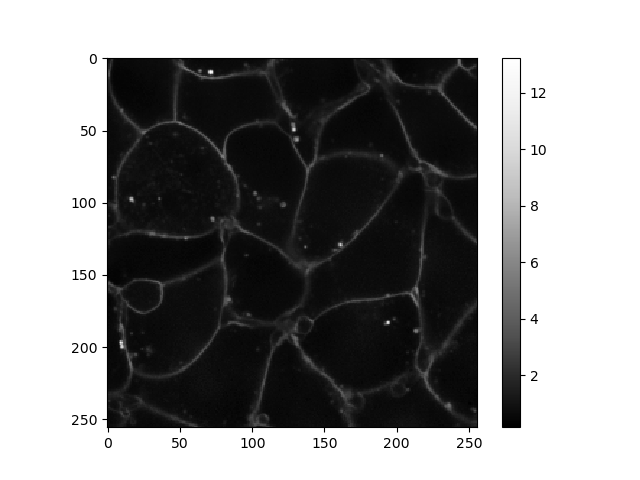
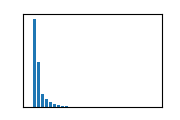

In [3]:
background_subtracted = cle.divide_by_gaussian_background(image, sigma_x=15, sigma_y=15)
background_subtracted

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
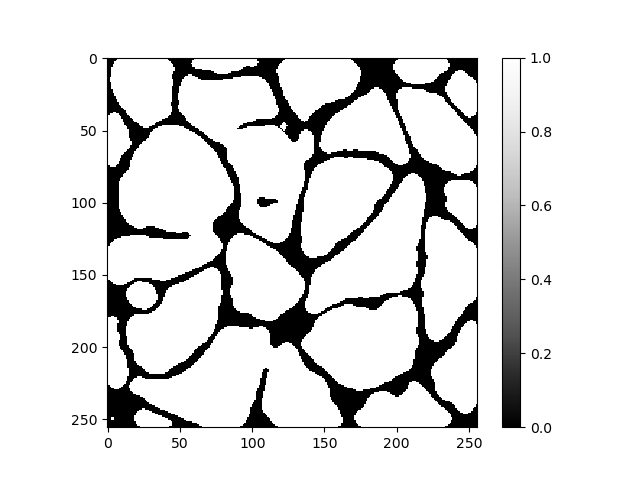
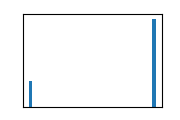

In [4]:
result_gpu = cle.morphological_chan_vese(background_subtracted, num_iter=3, smoothing=5)
result_gpu

When executing this notebook locally, you can tune parameters manually here:

In [5]:
stackview.interact(cle.morphological_chan_vese, background_subtracted)

## Benchmarking
The GPU-implementation is supposed to be faster than the CPU-version in scikit-image. This depends on the input data and the applied parameters. You can use the code section below to determine speedup for your specific use-case.

In [6]:
image = cells3d()[30,0,...]

In [7]:
def level_set_gpu():
    result_gpu = cle.morphological_chan_vese(image, num_iter=20, smoothing=10)

def level_set_cpu():
    result_cpu = morphological_chan_vese(image, num_iter=20, smoothing=10)

In [8]:
time_in_s = timeit.timeit(level_set_gpu, number=3)
print("GPU time = ", time_in_s)

GPU time =  1.839248200000001


In [9]:
time_in_s = timeit.timeit(level_set_cpu, number=3)
print("CPU time = ", time_in_s)

CPU time =  1.938188799999999


In [10]:
result_gpu = cle.morphological_chan_vese(image, num_iter=20, smoothing=10)
#result_gpu

In [11]:
result_cpu = morphological_chan_vese(image, num_iter=20, smoothing=10)
#stackview.insight(result_cpu)

In [12]:
stackview.curtain(result_cpu, np.asarray(result_gpu))

In [13]:
cle.array_equal(result_cpu, result_gpu)

True